# Stair detection

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from helperScripts.TimeKeeper import TimeKeeper

np.set_printoptions(suppress=True)
%matplotlib inline

### Intialize Timekeeper

In [6]:
timekeeper = TimeKeeper()

Function to display images inline

In [7]:
def imshow(image, figsize):
    plt.figure(figsize=figsize)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

#### Function to do canny edge detection

In [8]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv.Canny(image, lower, upper)

    # return the edged image
    return edged

### Reading images and detecting edges

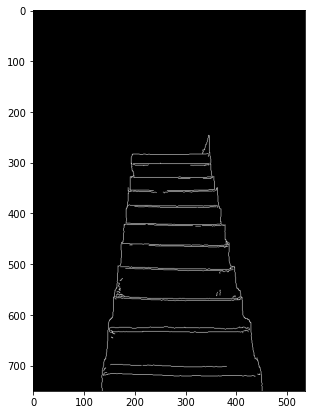

In [9]:
img = cv.imread("testImages\stairDetectionTestImages\stair.png")
blur = cv.GaussianBlur(img, (3,3), 0)
grey = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)
# edge = cv.Canny(grey, 100, 150, apertureSize=3)
edge = auto_canny(grey)

imshow(edge, (7,7))

### Fitting lines to edges

In [10]:
lines = cv.HoughLines(edge, 1, np.pi/180, 100)
print(lines.shape)
print(lines)

(28, 1, 2)
[[[ 633.            1.5707964 ]]

 [[ 302.            1.5707964 ]]

 [[ 329.            1.5707964 ]]

 [[ 422.            1.5707964 ]]

 [[ 416.            1.5882496 ]]

 [[ 571.            1.5707964 ]]

 [[ 625.            1.5707964 ]]

 [[ 709.            1.6057029 ]]

 [[ 568.            1.5707964 ]]

 [[ 237.            0.13962634]]

 [[ 501.            1.6057029 ]]

 [[ 457.            1.5882496 ]]

 [[ 385.            1.5707964 ]]

 [[ 506.            1.5882496 ]]

 [[ 628.            1.5882496 ]]

 [[ 695.            1.5882496 ]]

 [[ 350.            1.5882496 ]]

 [[ 562.            1.5882496 ]]

 [[ 246.            0.15707964]]

 [[ 503.            1.5882496 ]]

 [[ 558.            1.6057029 ]]

 [[ 691.            1.6057029 ]]

 [[-272.            2.9146998 ]]

 [[ 462.            1.5707964 ]]

 [[ 509.            1.5707964 ]]

 [[ 459.            1.5882496 ]]

 [[ 713.            1.5882496 ]]

 [[ 388.            1.5707964 ]]]


### View lines

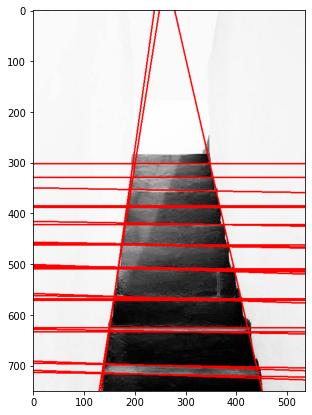

In [11]:
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + 1000 * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - 1000 * (a))
    
    cv.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)    


imshow(img, (7,7))

## Stair Angles

In [12]:
# Image refresh
image = cv.imread("testImages\stairDetectionTestImages\stair.png")

### Find stair side angles

0 Angle @ Left =  0.13962634
1 Angle @ Left =  0.15707964
0 Angle @ Right =  2.9146998


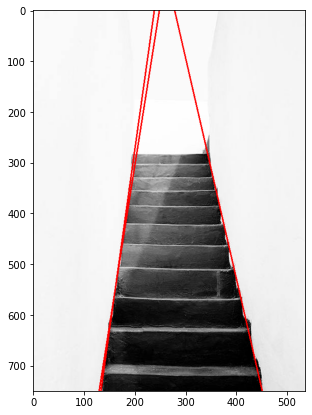

In [13]:
def returnStairSides(image, lines):
    """Return angles of stair sides in image"""
    angleL = []
    angleR = []
    image = image.copy()

    for line in lines:
        rho,theta = line[0]
        if 0.1<theta<0.8:
            print(len(angleL),'Angle @ Left = ', theta)

            a = np.cos(theta)
            b = np.sin(theta)

            x0 = a * rho
            y0 = b * rho

            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))

            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))

            cv.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
            angleL.append(theta)

        elif 2.4<theta<3:
            print(len(angleR),'Angle @ Right = ', theta)

            a = np.cos(theta)
            b = np.sin(theta)

            x0 = a * rho
            y0 = b * rho

            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))

            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))

            cv.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
            angleR.append(theta)

    angleL = np.mean(angleL)
    angleR = np.mean(angleR)

    return angleL, angleR, image

angleL, angleR, sideLineImage = returnStairSides(image, lines)
      
plt.figure(figsize=(7,7))
plt.imshow(cv.cvtColor(sideLineImage, cv.COLOR_BGR2RGB))

### Keeping Y-axis as base, angle is measured anti-clockwise. 

In [14]:
print("Stair side angle left = ", angleL)
print("Stair side angle light = ", angleR)

Stair side angle left =  0.14835298
Stair side angle light =  2.9146998


### Find horizontal step angles

0 Angle @ horizontal =  1.5707964
1 Angle @ horizontal =  1.5707964
2 Angle @ horizontal =  1.5707964
3 Angle @ horizontal =  1.5707964
4 Angle @ horizontal =  1.5882496
5 Angle @ horizontal =  1.5707964
6 Angle @ horizontal =  1.5707964
7 Angle @ horizontal =  1.6057029
8 Angle @ horizontal =  1.5707964
9 Angle @ horizontal =  1.6057029
10 Angle @ horizontal =  1.5882496
11 Angle @ horizontal =  1.5707964
12 Angle @ horizontal =  1.5882496
13 Angle @ horizontal =  1.5882496
14 Angle @ horizontal =  1.5882496
15 Angle @ horizontal =  1.5882496
16 Angle @ horizontal =  1.5882496
17 Angle @ horizontal =  1.5882496
18 Angle @ horizontal =  1.6057029
19 Angle @ horizontal =  1.6057029
20 Angle @ horizontal =  1.5707964
21 Angle @ horizontal =  1.5707964
22 Angle @ horizontal =  1.5882496
23 Angle @ horizontal =  1.5882496
24 Angle @ horizontal =  1.5707964


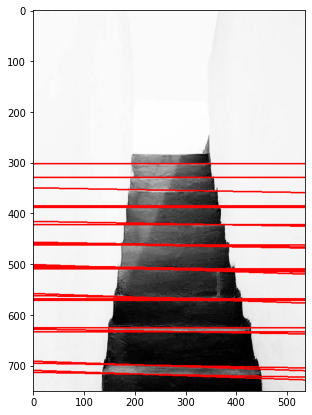

In [15]:
def returnStairSteps(image, lines, threshold=30):
    """Return angles of stair sides in image"""
    angleV = []
    image = image.copy()
    
    threshold = np.array([90+threshold, 90-threshold])*np.pi/180

    for line in lines:
        rho,theta = line[0]
        if threshold[1]<theta<threshold[0]:
            print(len(angleV),'Angle @ horizontal = ', theta)

            a = np.cos(theta)
            b = np.sin(theta)

            x0 = a * rho
            y0 = b * rho

            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))

            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))

            cv.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
            angleV.append(theta)
        
    angleV = np.mean(angleV)

    return angleV, image

angleV, stepLineImage = returnStairSteps(image, lines)

imshow(stepLineImage, (7,7))

If this value is close to 90 degrees, we are looking at the stairs straight on. To improve on this, we could weight the mean more towards the bottom stairs. 

In [16]:
print("Stair step angle horizontal = ", angleV*180/np.pi)

Stair step angle horizontal =  90.71999323545673


### Rho / Theta elimination

In [17]:
lines = lines[:,0,:]
print(lines.shape)

threshold = 30
threshold = np.array([90+threshold, 90-threshold])*np.pi/180
print(threshold)

mask = np.logical_and(lines[:,1]< threshold[0], lines[:,1]> threshold[1])
print(mask)


(28, 2)
[2.0943951  1.04719755]
[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True False  True  True  True False  True
  True  True  True  True]


In [18]:
lines = np.sort(lines[mask,:],axis=0)[::-1]
lines.shape

(25, 2)

In [19]:
# timekeeper.startPerfCounter()

rhos = lines[:,0]
print(rhos.shape)
rhosArray = np.repeat([rhos],rhos.shape[0],0)
# print(rhosArray.shape)

rhoDiff = abs(rhosArray - np.array([rhos]).T)
print(rhoDiff)

threshP = 15
mask = rhoDiff[:]< threshP
# print(mask)
mask = np.triu(mask,1)
print(mask)
mask = np.amax(mask,axis=0)
print(~mask)

linesClustered = lines[~mask,:]
print(linesClustered.shape)

# timekeeper.printPerfCounter()


(25,)
[[  0.   4.  18.  22.  80.  85.  88. 142. 145. 151. 155. 204. 207. 210.
  212. 251. 254. 256. 291. 297. 325. 328. 363. 384. 411.]
 [  4.   0.  14.  18.  76.  81.  84. 138. 141. 147. 151. 200. 203. 206.
  208. 247. 250. 252. 287. 293. 321. 324. 359. 380. 407.]
 [ 18.  14.   0.   4.  62.  67.  70. 124. 127. 133. 137. 186. 189. 192.
  194. 233. 236. 238. 273. 279. 307. 310. 345. 366. 393.]
 [ 22.  18.   4.   0.  58.  63.  66. 120. 123. 129. 133. 182. 185. 188.
  190. 229. 232. 234. 269. 275. 303. 306. 341. 362. 389.]
 [ 80.  76.  62.  58.   0.   5.   8.  62.  65.  71.  75. 124. 127. 130.
  132. 171. 174. 176. 211. 217. 245. 248. 283. 304. 331.]
 [ 85.  81.  67.  63.   5.   0.   3.  57.  60.  66.  70. 119. 122. 125.
  127. 166. 169. 171. 206. 212. 240. 243. 278. 299. 326.]
 [ 88.  84.  70.  66.   8.   3.   0.  54.  57.  63.  67. 116. 119. 122.
  124. 163. 166. 168. 203. 209. 237. 240. 275. 296. 323.]
 [142. 138. 124. 120.  62.  57.  54.   0.   3.   9.  13.  62.  65.  68.
   70. 109. 

In [20]:
print(linesClustered)

[[713.          1.6057029]
 [633.          1.5882496]
 [571.          1.5882496]
 [509.          1.5882496]
 [462.          1.5707964]
 [422.          1.5707964]
 [388.          1.5707964]
 [350.          1.5707964]
 [329.          1.5707964]
 [302.          1.5707964]]


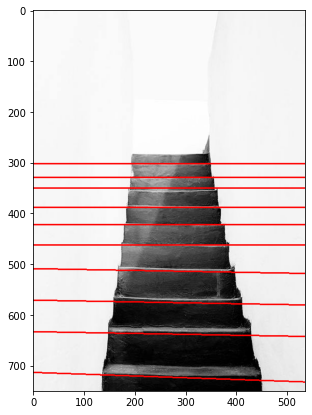

In [21]:
def drawLines(image, linesClustered):
    for line in linesClustered:
        rho,theta = line

        a = np.cos(theta)
        b = np.sin(theta)
    
        x0 = a * rho
        y0 = b * rho
    
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
    
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    return image

newImage = drawLines(image, linesClustered)
imshow(newImage,(7,7))